# Recognition Handwritten Digit on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.shape

(42000, 785)

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = df.values
data.shape

(42000, 785)

In [11]:
print(type(data))

<class 'numpy.ndarray'>


In [17]:
x = data[:,1:]
y = data[:,0]

In [18]:
x.shape

(42000, 784)

In [19]:
y.shape

(42000,)

In [20]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [16]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
# Train Test Split
# 80:20 rule 

split = int(0.8*x.shape[0])

In [22]:
split

33600

In [23]:
x_train = x[:split,:]
y_train = y[:split]

In [24]:
x_test = x[split:,:]
y_test = y[split:]

In [25]:
x_train.shape

(33600, 784)

In [26]:
y_train.shape

(33600,)

In [27]:
x_test.shape

(8400, 784)

In [22]:
y_test.shape

(8400,)

In [23]:
# visualise some samples

In [28]:
def drawImage(sample):
#     reshape that image
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

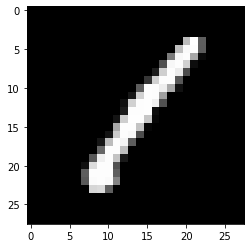

1

In [29]:
drawImage(x_train[0]) 
# initially it was a BGR image
y_train[0]

In [30]:
# distance formula between two numpy arrays - euclidean distance
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [32]:
#  KNN Algo
def knn(x,y,querypoint,k=5):
# Pick k neraest neighbors
# for every point in the x 
    vals = []
    for i in range(x.shape[0]):
#         compute distance
        d= distance(querypoint,x[i])
        vals.append((d,y[i]))
    
    
#     sort the array and find the k nearest points
    vals=sorted(vals)
    vals=vals[:k]
    
#     Majority vote
    vals = np.array(vals)
    new_values = np.unique(vals[:,1],return_counts=True)
    # print(new_values)
    
#     index of the maximum count
    index = new_values[1].argmax()
#     map this index with my data
    pred=new_values[0][index]
    return pred

In [33]:
# make predictions over test images
pred = knn (x_train,y_train,x_test[1])

In [34]:
pred

7.0

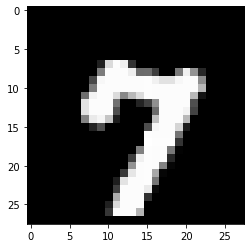

7

In [35]:
drawImage(x_test[1])
y_test[1]

In [36]:
# compute accuracy of this project 
error = pred - y_test[1]
error

0.0